# Computational Musicology Project
## Analysis of Turkish Makam Music (Using .txt annotations)

This is a continuation of the work done in the notebook "amp-musicology-project" trying to solve the issues with some xml files as shown in the notebook "mahurIssue". The .txt files in the SymbTr dataset is one of the representations of the scores. By comparing to the pdf files, It is known that some of the scores are annotated partially on this .txt files, so the results on this notebook cannot be directly compared with the results of the original notebook, but we can reach to similar conclusions.

### Research Question:
Is there a relation between the importance of a note within a makam and its beat position in the usul?

### Methodology:
Determine the top 10 combinations of makam and usuls in the database. 
Determine the most common makam notes that occur on the beats of the respective usul.
Plot a histogram that shows the occurrence of makam notes at each beat position of the usul. The histogram will contain the top three note names for each usul beat.

First, we declare some functions to handle the scores, we also have a file named "mu_Info.py", that should be in this same folder, containing information about the makams and usuls.

In [1]:
import os
import csv

from mu_Info import *

import matplotlib.pyplot as plt
import numpy as np

# This code will get a part from a score, retrieve all the notes with their offsets, and then compare to the beat positions of the usul
def get_notes_on_beat_txt(file, usul, beat_dict, pr = False):
    first_line = True
    offset = '0000'
    beat_name = [a[0]+'_{}'.format(a[1]) for a in usul]
    beats = [a[1] for a in usul]
    with open(file) as f:
        reader = csv.reader(f)
        for line in reader:
            if first_line:
                first_line = False
                continue
            s_line = line[0].split()
            if int(s_line[6]) == 0:
                continue
            if s_line[3] == 'Es':
                continue
            if offset in beats:
                n_pitch_name = s_line[3]
                if pr: print('ON BEAT:', n_pitch_name)
                note_name = ALL_NOTES_TXT.get(n_pitch_name, n_pitch_name)
                beat_tag = beat_name[beats.index(offset)]
                beat_dict[beat_tag] = beat_dict.get(beat_tag, dict())
                beat_dict[beat_tag][note_name] = beat_dict[beat_tag].get(note_name, 0) + 1
            offset = s_line[-1].split('.')[1][:4]
    return beat_dict

### Counting makam-usul combinations
The first step is to parse the database and determine how many different combinations of makams and usuls are found in the .xml files.
IMPORTANT: In the same folder of this notebook, should be the "SymbTr-2.0.0" database.

In [2]:
# Look at the filenames within this directory
makamUsul_dict = dict()
print('Reading data ...')
print('Looking for makam-usul combinations')

for root, dirs, files in os.walk('./SymbTr-2.0.0'):
    for file in files:
        # skip non ".txt" files
        if '.txt' not in file:
            continue
        sfile = file.split('--')
        # skip not correctly formatted file names
        if len(sfile) < 3:
            continue
        # count the occurrences of every combinations of makam-usul
        mu_key = sfile[0]+'--'+sfile[2]
        makamUsul_dict[mu_key] = makamUsul_dict.get(mu_key,0) + 1
        
print(len(makamUsul_dict), 'different combinations of makam-usul found')

Reading data ...
Looking for makam-usul combinations
870 different combinations of makam-usul found


### Filtering the top 10 makam-usul combinations
Next, the ten makam-usul combinations with the most attributed scores will be selected, so as not to analyze makam-usul combinations that are not commonly used in Turkish Makam music.  

In [3]:
mu_top = sorted(makamUsul_dict, key = makamUsul_dict.get, reverse = True)[0:10]
print('\nTop 10 combinations:')
_ = [print(mu) for mu in mu_top]


Top 10 combinations:
hicaz--aksak
nihavent--duyek
huzzam--aksak
ussak--sofyan
hicaz--sofyan
hicaz--duyek
ussak--aksak
segah--aksak
rast--duyek
mahur--aksak


### Score analysis
We can then create a dictionary containing all the scores from the top 10 makam-usul combinations that are to be analyzed.

In [4]:
print('\nSelecting the files with the desired makam-usul combination')
print('Removing key signatures out of the xml file')
f_dict = dict()

for root, dirs, files in os.walk('./SymbTr-2.0.0'):
    for file in files:
        # skip non ".txt" files
        if '.txt' not in file:
            continue
        sfile = file.split('--')
        # skip not correctly formated file names
        if len(sfile) < 3:
            continue
        mu_key = mu_key = sfile[0]+'--'+sfile[2]
        if mu_key in mu_top:
            f_dict[root+'/'+file] = {'group': mu_key, 'makam': sfile[0], 'usul': sfile[2]}

print(len(f_dict), 'scores will be computed')


Selecting the files with the desired makam-usul combination
Removing key signatures out of the xml file
209 scores will be computed


For each score, the number of makam notes that occur on the usul beats will be tallied and classified per makam note name. 

In [5]:
print('Starting the score analysis ...')
beat_dict = dict()

for file, values in f_dict.items():
    # beat_dict contains the whole structure
    # the first level are dictionaries by combination
    beat_dict[values['group']] = beat_dict.get(values['group'], dict())
    usul = USUL_TS[values['usul']]
    beat_dict[values['group']] = get_notes_on_beat_txt(file, usul, beat_dict[values['group']])

print('Score analysis: DONE')

Starting the score analysis ...
Score analysis: DONE


### Counting the occurrences of makam notes on usul beat positions
For each of the ten makam-usul combinations, we will print the three most common notes that occur on each of the usul beats.

In [6]:
top_dict = dict()

for mu in mu_top:
    top_dict[mu] = dict()
    makam = mu.split('--')[0]
    usul = USUL_TS[mu.split('--')[1]]
    beat_name = [a[0]+'_{}'.format(a[1]) for a in usul]
    print('\nMost common notes of the makam {} on the usul`s beat {}:'.format(makam, mu.split('--')[1]))
    for beat in beat_name:
        top_notes = sorted(beat_dict[mu][beat], key = beat_dict[mu][beat].get, reverse = True)[0:3]
        top_dict[mu][beat] = [(note, beat_dict[mu][beat][note]) for note in top_notes]
        print(beat, top_dict[mu][beat])
    print(makam, 'notes:')
    print(MAKAM[makam])



Most common notes of the makam hicaz on the usul`s beat aksak:
dum_0000 [('Neva', 211), ('Huseyni', 195), ('Kaba Dugah', 185)]
te_2222 [('Nim Hicaz', 210), ('Huseyni', 191), ('Neva', 141)]
ke_3333 [('Neva', 229), ('Huseyni', 145), ('Kaba Dik Kurdi', 129)]
dum_4444 [('Huseyni', 260), ('Nim Hicaz', 217), ('Kaba Dugah', 160)]
tek_6666 [('Huseyni', 218), ('Kaba Dugah', 208), ('Nim Hicaz', 190)]
tek_8888 [('Huseyni', 184), ('Kaba Dugah', 158), ('Neva', 155)]
hicaz notes:
['Dugah', 'Dik Kurdi', 'Nim Hicaz', 'Neva', 'Huseyni', 'Evic', 'Gerdaniye', 'Muhayyer']

Most common notes of the makam nihavent on the usul`s beat duyek:
dum_0000 [('Neva', 464), ('Gerdaniye', 189), ('Cargah', 188)]
tek_1250 [('Neva', 113), ('Gerdaniye', 90), ('Kaba Kurdi', 66)]
tek_3750 [('Neva', 228), ('Gerdaniye', 149), ('Cargah', 134)]
dum_5000 [('Neva', 291), ('Kaba Kurdi', 192), ('Cargah', 186)]
tek_7500 [('Neva', 258), ('Kaba Kurdi', 156), ('Nim Hisar', 138)]
nihavent notes:
['Rast', 'Dugah', 'Kurdi', 'Cargah', 'Ne

The results show that the most common note that occurs on the usul beats is usually the dominant note of the particular makam scale. For example, in the makam Segah, whose tonic is Segah and dominant note is Neva, the most common note occurring on almost every usul beat is the Neva.

An interesting result is that the tonic note of the makam scales is almost never in the top 3 most occurring makam notes. For instance, the tonic of the makam Mahur is Rast, and it does not occur in the top 3 notes on any of its usul beats. The same goes for the Segah note in the makam Segah. There are also instances where there are frequent occurrences of the tonic note transposed by an octave, like for the makam Ussak. The tonic Dugah never appears in the top 3, however the Kaba Dugah note occurs often on beats 1, 5, and 7. 

These results are curious; although it is to be expected that the dominant note appears often on the usul beats, the rarity of the tonic note is unexpected. Perhaps this is due to the use of suspended cadences. The suspended cadences of a makam occur often on the usul beats, as is shown in the results above. This may indicate that the tonic is played less often so as to heighten the satisfaction of returning to the final tonic at the end of a section or of the entire song. The deceptive cadence is often used in Western classical music as well. 

In [7]:
print("Whole list of notes occurrence")
for mu in mu_top:
    print()
    print(mu.upper())
    for bt in beat_dict[mu]:
        print()
        print(bt, beat_dict[mu][bt])
    print()

Whole list of notes occurrence

HICAZ--AKSAK

dum_0000 {'Irak': 2, 'Kaba Dugah': 185, 'Huseyni': 195, 'Neva': 211, 'Dugah': 81, 'Gerdaniye': 84, 'Kaba Dik Kurdi': 38, 'Rast': 33, 'Cargah': 3, 'Evic': 22, 'Nim Hicaz': 141, 'Tiz Cargah': 3, 'Acem': 25, 'Buselik': 1, 'Segah': 1, 'Dik Kurdi': 4, 'Kaba Segah': 2, 'Kaba Buselik': 2, 'Dik Acem': 2, 'Nim Hisar': 2, 'Nim Sehnaz': 2}

tek_6666 {'Kaba Dugah': 208, 'Huseyni': 218, 'Neva': 157, 'Evic': 27, 'Gerdaniye': 49, 'Dugah': 87, 'Buselik': 5, 'Tiz Cargah': 10, 'Nim Hicaz': 190, 'Acem': 61, 'Kaba Dik Kurdi': 49, 'Rast': 9, 'Tiz Neva': 1, 'Yegah': 3, 'Huseyni Asiran': 2, 'Dik Kurdi': 4, 'Cargah': 3, 'Kaba Segah': 2, 'Tiz Nim Hicaz': 1, 'Kaba Buselik': 1, 'Dik Acem': 2}

tek_8888 {'Rast': 37, 'Huseyni': 184, 'Nim Hicaz': 106, 'Evic': 68, 'Gerdaniye': 71, 'Neva': 155, 'Kaba Dugah': 158, 'Kaba Dik Kurdi': 79, 'Dugah': 54, 'Acem': 19, 'Tiz Cargah': 1, 'Buselik': 4, 'Dik Kurdi': 2, 'Yegah': 4, 'Irak': 4, 'Cargah': 14, 'Kaba Segah': 1, 'Dik Acem': 9

### Plotting a histogram
Using these makam note occurrences, we can now plot a histogram that shows the occurrences for each note at each beat position in the usul. The result will consist of 10 histograms, one for each makam-usul combination.

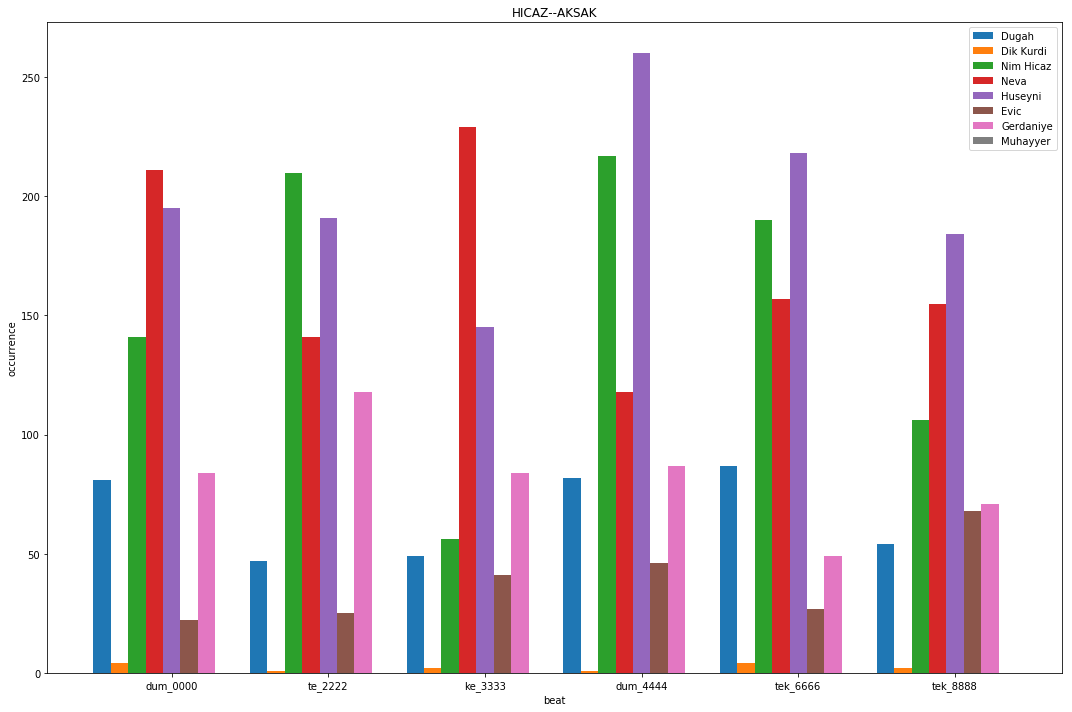

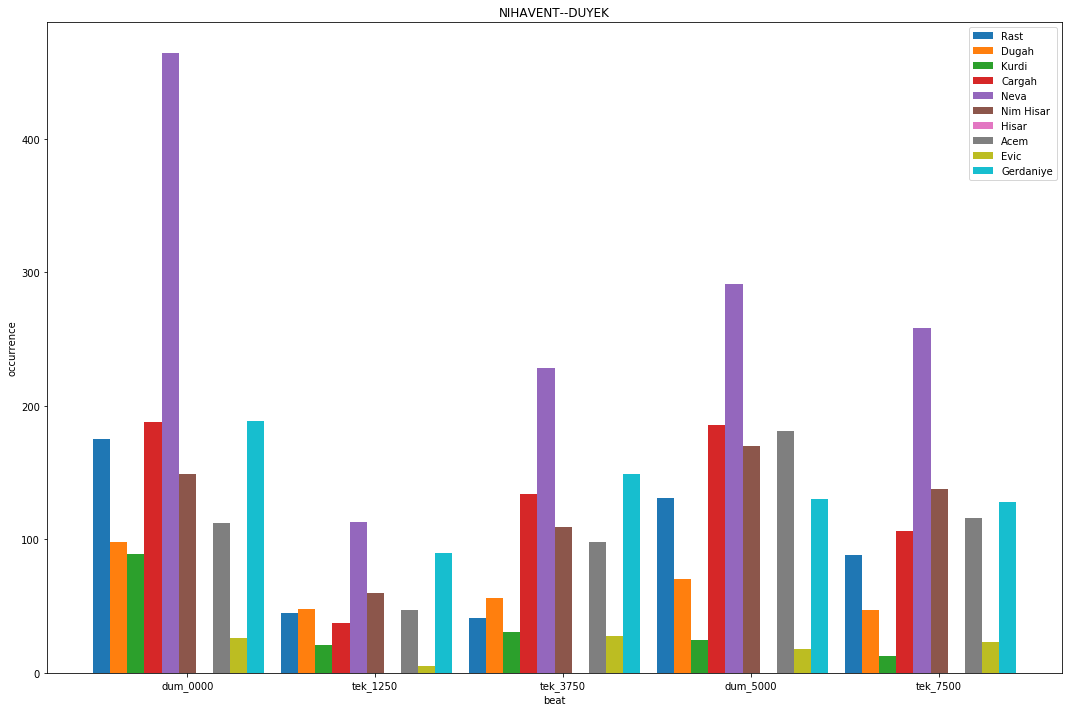

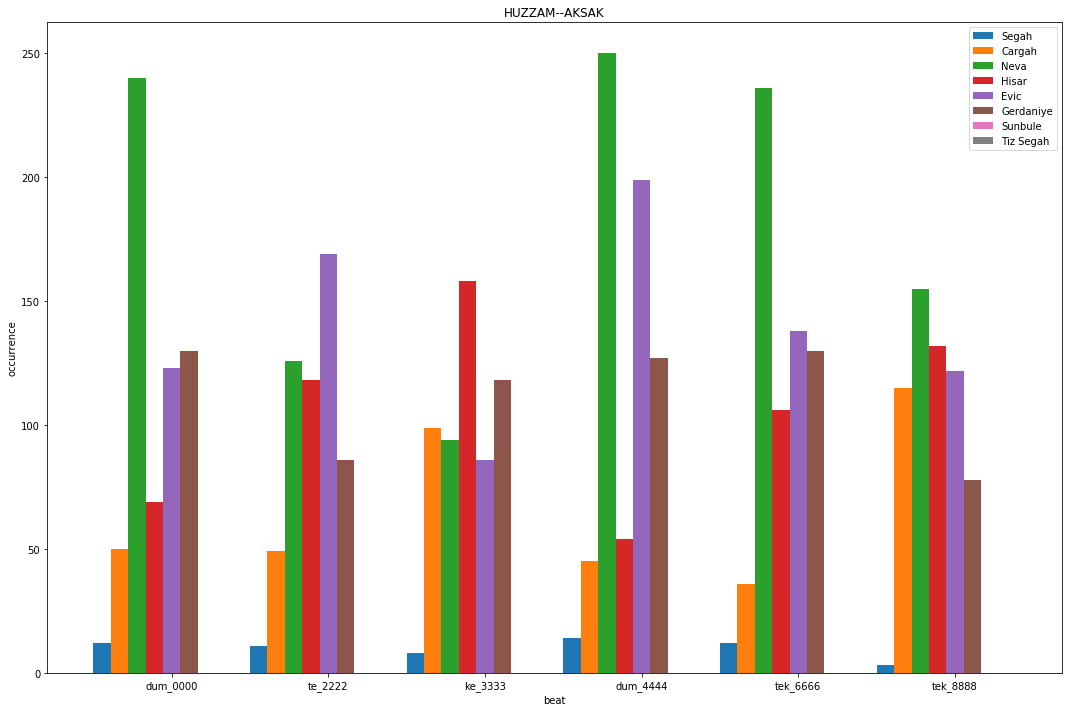

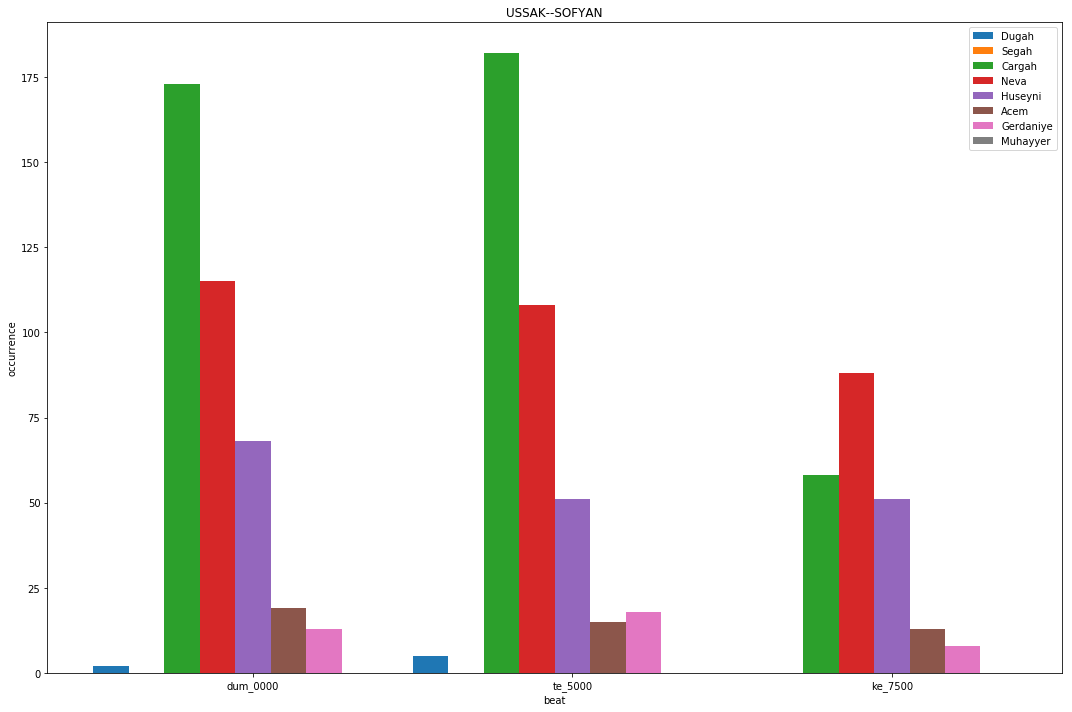

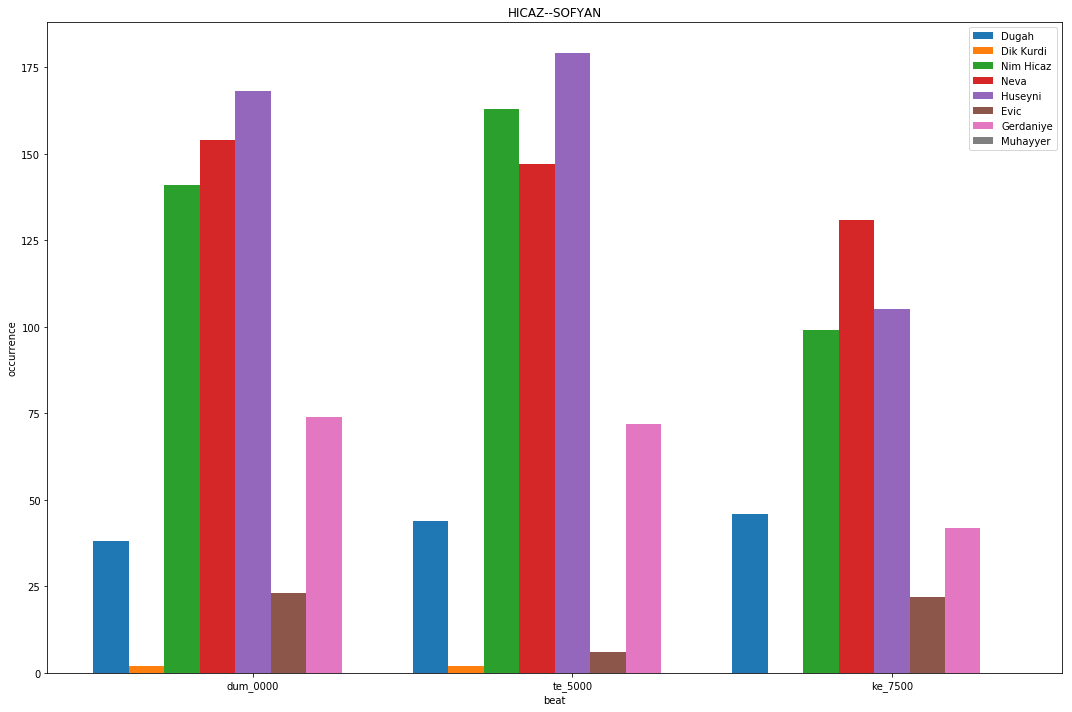

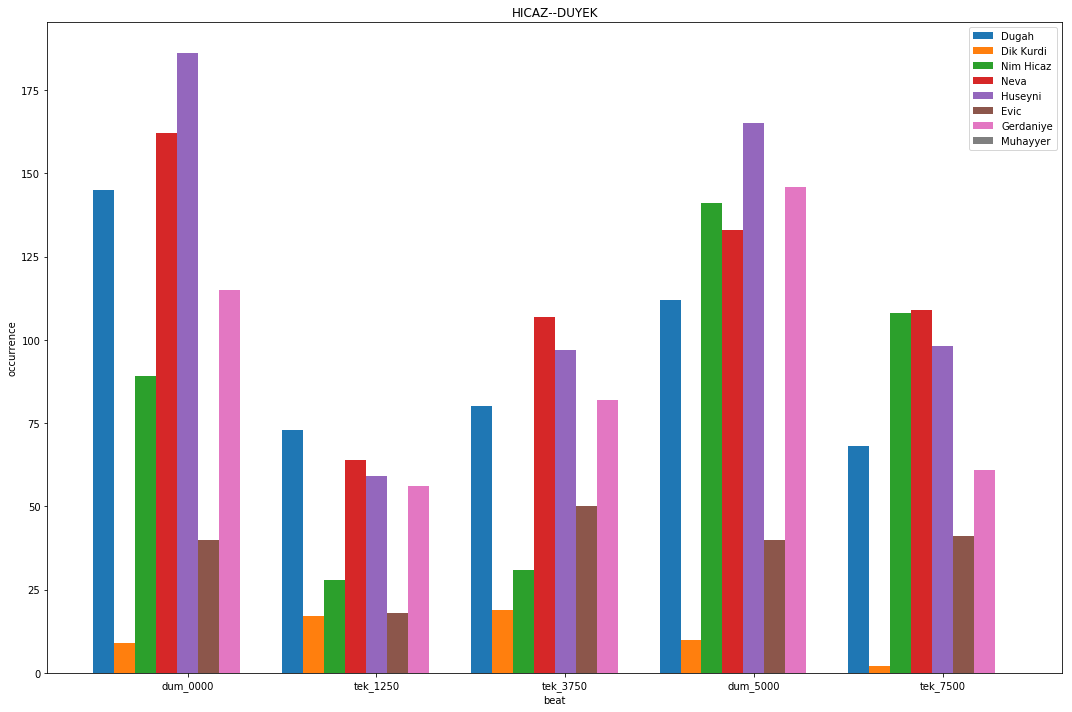

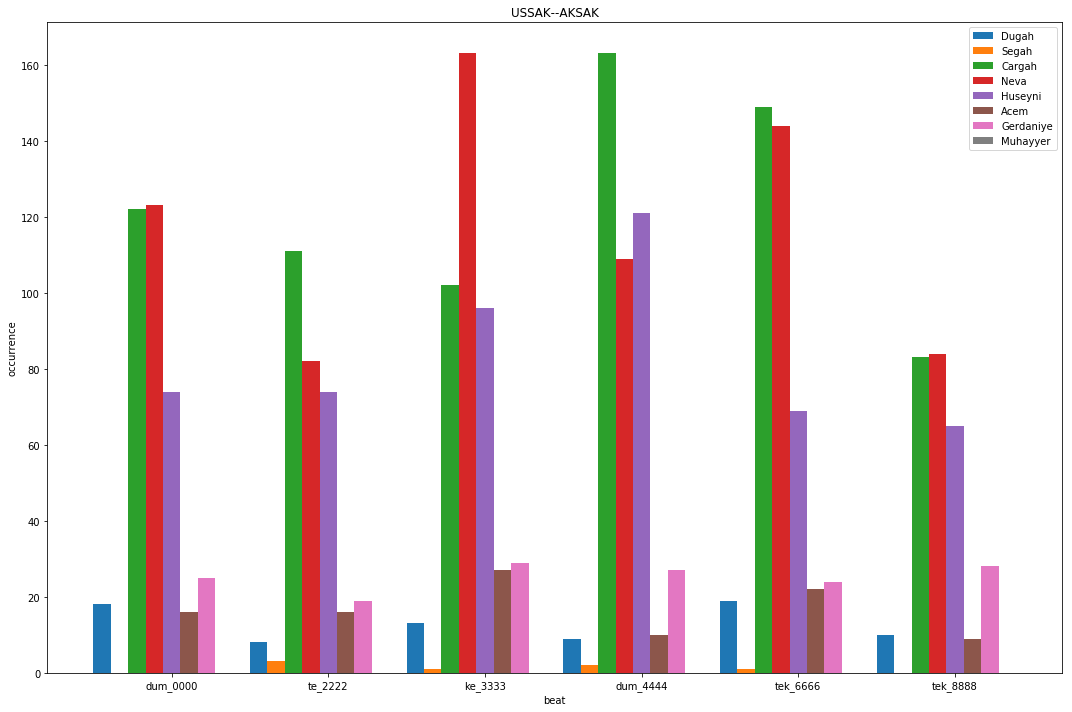

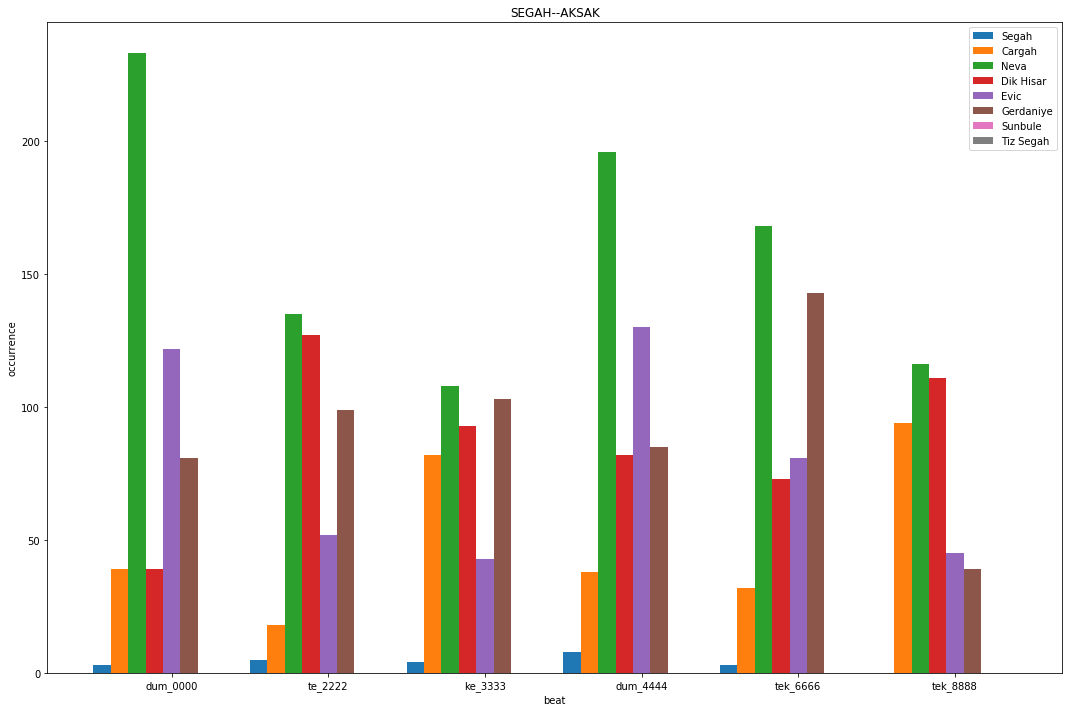

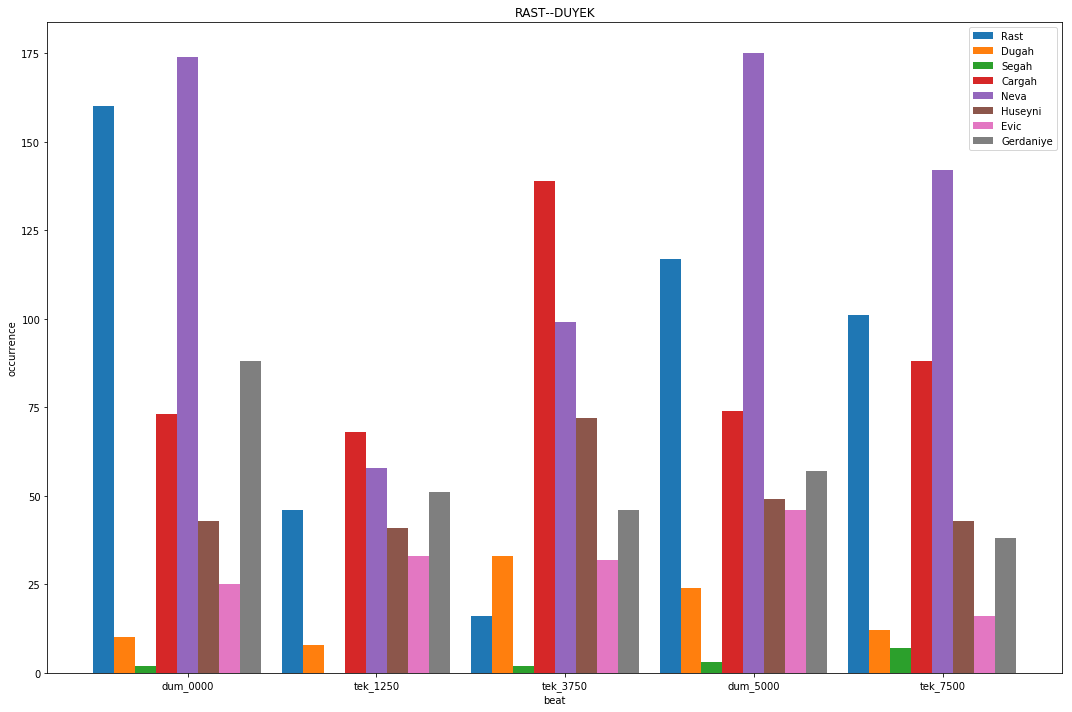

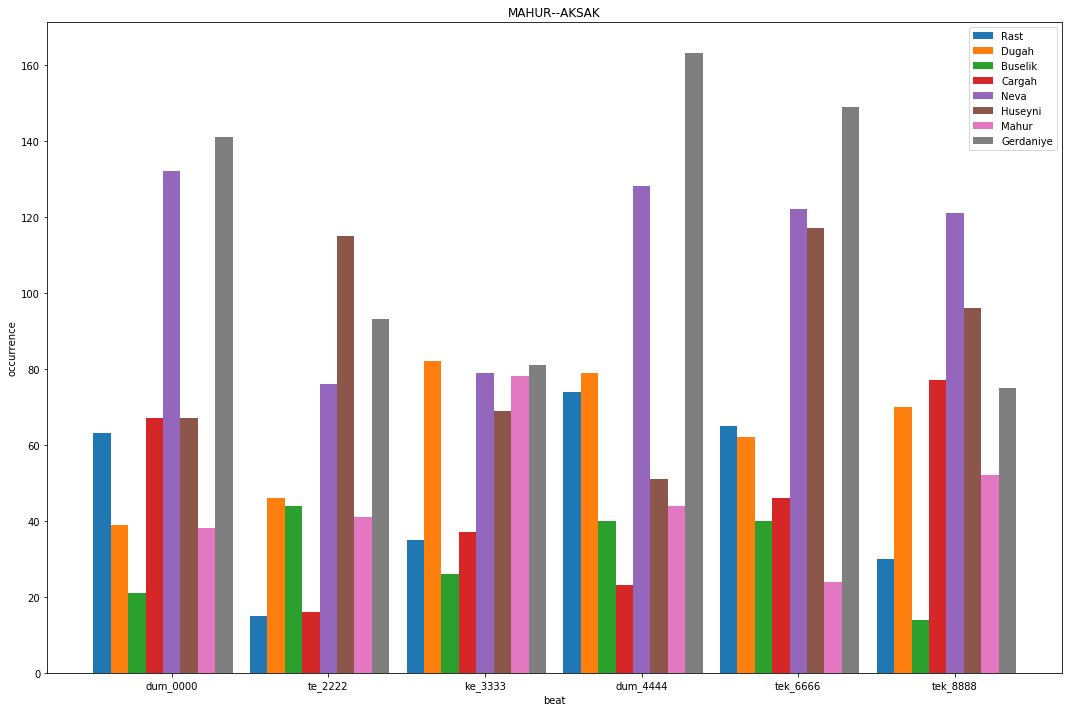

In [8]:
bar_width = 0.35
for mu in mu_top:
    # import ipdb; ipdb.set_trace()
    fig, ax = plt.subplots(figsize = (15,10))
    makam_notes = MAKAM[mu.split('--')[0]]
    usul = USUL_TS[mu.split('--')[1]]
    n_groups = len(usul)
    index = np.arange(n_groups)*bar_width*(1+len(makam_notes))
    beat_name = [a[0]+'_{}'.format(a[1]) for a in usul]
    for note in makam_notes:
        occu = tuple([beat_dict[mu][beat].get(note, 0) for beat in beat_name])
        rects = ax.bar(index, occu, bar_width, label=note)
        index = index + bar_width
    ax.set_xlabel('beat')
    ax.set_ylabel('occurrence')
    ax.set_title(mu.upper())
    ax.set_xticks( np.arange(n_groups)*bar_width*(1+len(makam_notes)) + bar_width*(len(makam_notes))/2)
    ax.set_xticklabels(tuple(beat_name))
    ax.legend()
    fig.tight_layout()
    plt.savefig('./generated_histograms/'+mu+'_txt.png', format = 'png')
    plt.show()

There are differences between this results and the ones obtained in the original notebook (using XML annotations). But when comparing the text data with the scores on the pdf files we couldn't find any discrepancy rather than that some scores are annotated partially. Also, using this data representation we solved the issue of the mahur makam so we use this annotations as the ground thuth in our discussion instead of the obtained previously

Finally, we reach to the same conclusions as with the previous notebook.